# Assignment 1
This assignment has two questions:
 - Q1: Probability
 - Q2: Linear Regression

Utilize the designated cell within this notebook to complete the exercises. As for the Python exercises:
- Refrain from altering the provided code; simply fill in the missing portions as indicated.
- Do not use any additional libraries beyond those already included in the code (e.g., NumPy and Matplotlib library).
- Make sure that the output of all code cells is visible in your submitted notebook. **The evaluator is NOT expected to execute your code before grading your submission.**
   
Please identify the authors of this assignment in the cell below.

# **Identification**

* **Name:** João Valério Rocha
* **Student Number:** up202004134

* **Name:** Maria Carolina Pontes
* **Student Number:** up202107413

* **Name:** Maria Inês Oliveira
* **Student Number:** up202104740

---


**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

## 1. Probability exercise
A city has 3 RADARs (𝐴,
𝐵, and
𝐶) in different locations to detect aerial threats.  These sensors have a stochastic detection capability as a function of range coordinates **x=**$(x_1, x_2)$, which can be modeled by a 2D Gaussian distribution $N (\mu, \Sigma)$. Any moving object appearing in the air will generate a footprint area in the detection range  of each RADAR that is used to estimate the probability of that threat be properly detected:
Each RADAR has a particular stochastic model:
 - 𝐴 is unknown but there is a dataset available;
 - 𝐵 is unknown but there is a dataset available;
 - 𝐶 is described below:

\begin{align}
\mu_C = \begin{pmatrix}
1.5 \\
1.5  
\end{pmatrix},
\end{align}

\begin{align}
\Sigma_C = \begin{pmatrix}
0.5 & 0.0 \\
0.0 & 0.5
\end{pmatrix}.
\end{align}

𝐴, 𝐵 and 𝐶 have independent sensing capabilities.

In [11]:
# Load libraries that you are allowed to use
import numpy as np
import matplotlib.pyplot as plt

a)  **characterize the detection capability of RADARs 𝐴 and 𝐵, by writing the formulas for the parameter estimates and probability density functions of each distribution.**

First, indicate all mathematical expressions that are needed to solve this exercise and then, implement the solution in Python.


Tip: use the [Latex syntaxe](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/main/lessons/00/intro_to_latex.ipynb#scrollTo=QOEFZmw4Z1GJ) to show the mathematical expessions.

### **Mean**

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

### **Covariance**
$$
\Sigma = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)(x_i - \mu)^T
$$

### **Probability Density Function (PDF) Expression**
$$
f(\mathbf{x}) = \frac{1}{(2\pi)^{l/2} |\mathbf{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \mathbf{\mu})^\top \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})\right)
$$

Where $l$ is equal to the dimension of vector $\mathbf{x}$. In this case $l=2$


<font color='green'> ToDO!</font>

In [12]:
# Read the text file back into a NumPy array
X_A = loaded_array = np.loadtxt("ml_dataset_q1_A", delimiter=' ')
X_B = loaded_array = np.loadtxt("ml_dataset_q1_B", delimiter=' ')


In [13]:
# ToDo the code
#...

# Mean and Covariance of RADAR A
mean_A = np.array([np.mean(X_A[:, 0]), np.mean(X_A[:, 1])])
cov_A = np.cov(X_A[:, 0], X_A[:, 1])

# Mean and Covariance of RADAR B
mean_B = np.array([np.mean(X_B[:, 0]), np.mean(X_B[:, 1])])
cov_B = np.cov(X_B[:, 0], X_B[:, 1])

# Probability Density Function (PDF)
def pdf(point, mean, cov):
    pdf = (1 / (2 * np.pi * np.sqrt(np.linalg.det(cov)))) * np.exp(-0.5 * np.dot(np.dot((point - mean), np.linalg.inv(cov)), (point - mean).T))
    return pdf

# PDF of RADAR A
pdf_A = pdf(X_A, mean_A, cov_A)

# PDF of RADAR B
pdf_B = pdf(X_B, mean_B, cov_B)

print("mean A = ", mean_A)
print("Cov A  = ", cov_A, "\n\r")
print("mean B = ", mean_B)
print("Cov B  = ", cov_B, "\n\r")

print("pdf_A = ", pdf_A, "\n\r")
print("pdf_B = ", pdf_B)


# ...



mean A =  [0.89750403 1.30273791]
Cov A  =  [[0.98466546 0.26778636]
 [0.26778636 1.30541953]] 

mean B =  [2.31641946 2.31896158]
Cov B  =  [[ 0.95273342 -0.28039522]
 [-0.28039522  1.39752779]] 

pdf_A =  [[0.02734601 0.07967066 0.25638363 ... 0.17433397 0.15382291 0.05004189]
 [0.07967066 0.09869635 0.2895915  ... 0.12020526 0.15969392 0.13078491]
 [0.25638363 0.2895915  0.02838919 ... 0.28148721 0.11269594 0.09214782]
 ...
 [0.17433397 0.12020526 0.28148721 ... 0.09723681 0.16110217 0.24715802]
 [0.15382291 0.15969392 0.11269594 ... 0.16110217 0.1390336  0.13212369]
 [0.05004189 0.13078491 0.09214782 ... 0.24715802 0.13212369 0.04620228]] 

pdf_B =  [[0.10886731 0.2214582  0.17897345 ... 0.11196423 0.09964373 0.14119922]
 [0.2214582  0.0629804  0.09087487 ... 0.28237005 0.24301533 0.15361109]
 [0.17897345 0.09087487 0.11039144 ... 0.22232376 0.18466679 0.15108696]
 ...
 [0.11196423 0.28237005 0.22232376 ... 0.03984861 0.12600207 0.11115934]
 [0.09964373 0.24301533 0.18466679 ... 0.


b) **Calculate the probability density of a potential threat at grid coordinate (1.5, 1.5) be detected by 𝐴. Repeat for 𝐵.** Implement the solution in Python.

In [4]:
# ToDo the code
#...

# Potential threat at grid coordinate (1.5, 1.5)
point = np.array([1.5,1.5])

# PDF of RADAR A at the potential threat
p_A_when_x = pdf(point, mean_A, cov_A)

# PDF of RADAR B at the potential threat
p_B_when_x = pdf(point, mean_B, cov_B)

print("pdf(A = (1.5 1.5) ) =", p_A_when_x)
print("pdf(B = (1.5 1.5) ) =", p_B_when_x)

pdf(A = (1.5 1.5) ) = 0.1200927903740377
pdf(B = (1.5 1.5) ) = 0.06541517433450948


c) **What is the probability density of a threat in coordinate (1.9, 2.1) be detected by all city's RADARs ?** Implement the solution in Python. Plot the contour curves of the detection profile for each RADAR and for a threat being detected by all RADARs.

pdf(A = (1.9 2.1) ) = 0.07756157159118704
pdf(B = (1.9 2.1) ) = 0.1241904916763052
pdf(C = (1.9 2.1) ) = 0.18924176795831746
pdf(A, B, C) = 0.12585199933233668


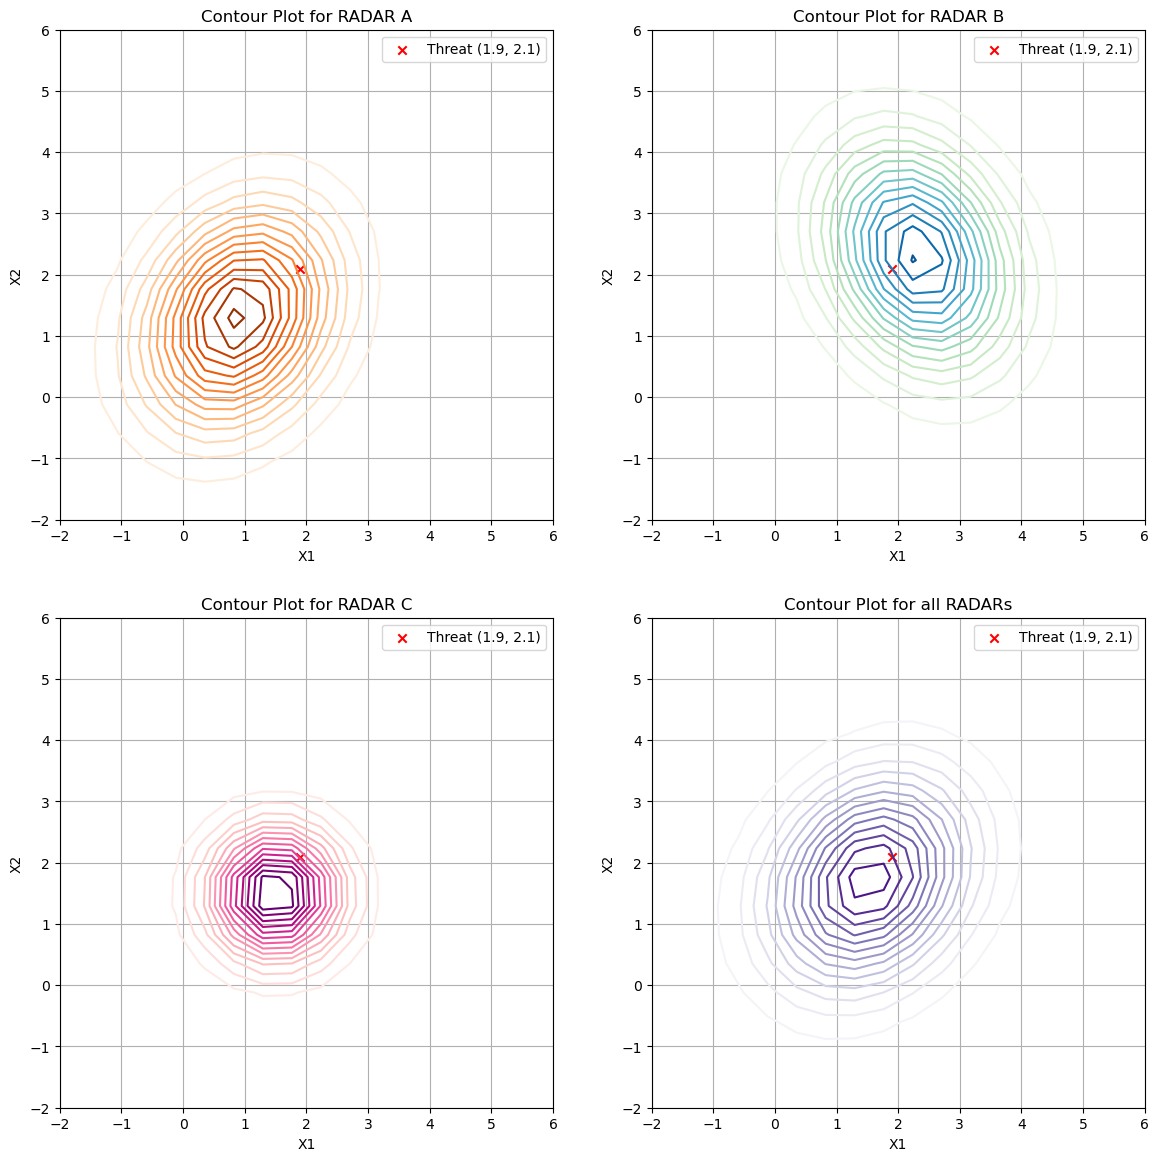

In [5]:
# ToDo the code
#...

# Potential threat at grid coordinate (1.9, 2.1)
point = np.array([1.9,2.1])

# Mean and Covariance of RADAR C
mean_C = np.array([1.5,1.5])
cov_C = np.array([[0.5, 0],[0, 0.5]])

# Mean and Covariance of all the RADARs
X_ABC = loaded_array = np.loadtxt("ml_dataset_q1_A_B_C", delimiter=' ')
mean_ABC = np.array([np.mean(X_ABC[:, 0]), np.mean(X_ABC[:, 1])])
cov_ABC = np.cov(X_ABC[:, 0], X_ABC[:, 1])

# PDF of the RADARs at the potential threat
p_A_when_x = pdf(point, mean_A, cov_A)
p_B_when_x = pdf(point, mean_B, cov_B)
p_C_when_x = pdf(point, mean_C, cov_C)
p_x_A_B_C = pdf(point, mean_ABC, cov_ABC)

print("pdf(A = (1.9 2.1) ) =", p_A_when_x)
print("pdf(B = (1.9 2.1) ) =", p_B_when_x)
print("pdf(C = (1.9 2.1) ) =", p_C_when_x)
print("pdf(A, B, C) =", p_x_A_B_C)

## Curve curves
x_range        = np.linspace(-2, 6, 18)
y_range        = np.linspace(-2, 6, 18)
x_grid, y_grid = np.meshgrid(x_range, y_range)

place = np.empty(x_grid.shape + (2,))
place[:, :, 0] = x_grid
place[:, :, 1] = y_grid

#Calculate the PDF for each point on the grid
pdf_A_grid = np.zeros(x_grid.shape)
pdf_B_grid = np.zeros(x_grid.shape)
pdf_C_grid = np.zeros(x_grid.shape)
pdf_ABC_grid = np.zeros(x_grid.shape)

for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        pdf_A_grid[i, j] = pdf(place[i, j], mean_A, cov_A)
        pdf_B_grid[i, j] = pdf(place[i, j], mean_B, cov_B)
        pdf_C_grid[i, j] = pdf(place[i, j], mean_C, cov_C)
        pdf_ABC_grid[i, j] = pdf(place[i, j], mean_ABC, cov_ABC)

#Plot Contour for RADAR A
plt.figure(figsize=(14, 14))

plt.subplot(2,2,1)
plt.contour(x_grid, y_grid, pdf_A_grid, levels=15, cmap='Oranges')
plt.scatter(point[0], point[1], color='red', marker='x', label="Threat (1.9, 2.1)")
plt.title('Contour Plot for RADAR A')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()

#Plot Contour for RADAR B
plt.subplot(2,2,2)
plt.contour(x_grid, y_grid, pdf_B_grid, levels=15, cmap='GnBu')
plt.scatter(point[0], point[1], color='red', marker='x', label="Threat (1.9, 2.1)")
plt.title('Contour Plot for RADAR B')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()

#Plot Contour for RADAR C
plt.subplot(2,2,3)
plt.contour(x_grid, y_grid, pdf_C_grid, levels=15, cmap='RdPu')
plt.scatter(point[0], point[1], color='red', marker='x', label="Threat (1.9, 2.1)")
plt.title('Contour Plot for RADAR C')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()

#Plot Contour for all Radars combined
plt.subplot(2,2,4)
plt.contour(x_grid, y_grid, pdf_ABC_grid, levels=15, cmap='Purples')
plt.scatter(point[0], point[1], color='red', marker='x', label="Threat (1.9, 2.1)")
plt.title('Contour Plot for all RADARs')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()
plt.show()
#...


## 2. Linear regression exercise

The software of each RADAR analyses the orientations $(x_1, x_2)$ and the  signal strength ($x_3$) to calculate the range of a potential threat as $f(x) = \theta_0 + \theta_1 \sin(x_1) + \theta_2 \cos(x_2) + \theta_3 e^{x_3}$.

In [6]:
# Load libraries that you are allowed to use
import numpy as np
import matplotlib.pyplot as plt

a) **The optimal parameters for the linear regression problem can be obtained by solving
$$ \min_{\boldsymbol{\theta}} ||\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\theta}||_2^2 $$
for suitably defined matrices/vectors $\boldsymbol{\theta}$, $\boldsymbol{X}$, and $\boldsymbol{y}$. Provide explicit definitions for these matrices/vectors.**

Tip: use the [Latex syntaxe](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/main/lessons/00/intro_to_latex.ipynb#scrollTo=QOEFZmw4Z1GJ) to show the mathematical expessions.

<font color='green'> ToDO!</font>

**Vector $\boldsymbol{y}$**
   - The vector $\boldsymbol{y}$ represents the dependent variable or the output we are trying to predict. It is usually defined as:
   $$
   \boldsymbol{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
   $$
   where $y_i$ is the observed value of the response variable for the $i$-th observation, and $n$ is the total number of observations.


**Matrix $\boldsymbol{X}$**:
   - The matrix $\boldsymbol{X}$ contains the independent variables or features. Each row corresponds to an observation, and each column corresponds to a feature (predictor). For a linear regression with $p$ predictors, it can be defined as:
   $$
   \boldsymbol{X} = \begin{bmatrix} 
   1 & x_{11} & x_{12} & \cdots & x_{1p} \\ 
   1 & x_{21} & x_{22} & \cdots & x_{2p} \\ 
   \vdots & \vdots & \vdots & \ddots & \vdots \\ 
   1 & x_{n1} & x_{n2} & \cdots & x_{np} 
   \end{bmatrix}
   $$
   Here, $x_{ij}$ is the value of the $j$-th predictor for the $i$-th observation. The first column (consisting of all 1s) is added to accommodate the intercept term in the linear model.

**Vector $\boldsymbol{\theta}$**:
   - The vector $\boldsymbol{\theta}$ contains the coefficients of the linear regression model. It can be defined as:
   $$
   \boldsymbol{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_p \end{bmatrix}
   $$
   where $\boldsymbol{\theta_0}$ is the intercept and $\boldsymbol{\theta_1}$, $\boldsymbol{\theta_2}$, ...,  $\boldsymbol{\theta_p}$ are the coefficients corresponding to the $p$ predictors.


b) **Find the $\boldsymbol{\hat \theta}$ to this problem by considering the following dataset $\{(x_i, y_i)\}_{i=1}^n$.**

In [7]:
# Read the text file back into a NumPy array
dataset_q2 = loaded_array = np.loadtxt("ml_dataset_q2", delimiter=' ')
dataset = dataset_q2
inputs     = dataset[:, 0:3]
y          = dataset[:, -2]   #label for the training

dataset_q2 = loaded_array = np.loadtxt("ml_dataset_q2_test", delimiter=' ')
dataset = dataset_q2
inputs     = dataset[:, 0:3]  #similar inputs
y_test     = dataset[:, -1]   #label for the testing


In [8]:
# ToDo the code
theta = np.zeros(4)  # just to prevent the code from throwing an error before it's fully implemented
optimal_theta = np.linalg.inv(inputs.T @ inputs) @ inputs.T @ y
print("Optimal theta matrix is:", optimal_theta)
#...

Optimal theta matrix is: [-2.58002124e-01  6.14977465e-04  4.88719414e+00]


c) **Find the solution to the Ridge regression problem as defined in the previous exercise by completing the code below.** The variable `reg` in the code corresponds to the regularization weight $\lambda$.

In [9]:
# ToDo the code
theta_ridge = np.zeros(4)  # just to prevent the code from throwing an error before it's fully implemented
reg         = 50.0  # regularization weight (DO NOT CHANGE)
I = np.eye(inputs.shape[1])
optimal_theta_ridge = np.linalg.inv(inputs.T @ inputs + reg * I) @ (inputs.T @ y)
print("Optimal theta matrix is:", optimal_theta)
#...

Optimal theta matrix is: [-2.58002124e-01  6.14977465e-04  4.88719414e+00]


d) **Compute the mean-squared errors (MSE) of the two models in the training set and in a separate test set.** Your should avoid utilizing for-loops. Use NumPy vectorized operations instead.

In [10]:
# ToDo the code
#...

y_pred = inputs @ optimal_theta
y_pred_ridge = inputs @ optimal_theta_ridge

# Calculate MSE
mse_train = np.mean((y - y_pred) ** 2)
mse_train_ridge = np.mean((y - y_pred_ridge) ** 2)

mse_test = np.mean((y_test - y_pred) ** 2)
mse_test_ridge = np.mean((y_test - y_pred_ridge) ** 2)


print("MSE in the training data:")
print(f"  Linear regression (no reg.): {mse_train:.5f}")
print(f"  Ridge regression (lambda = {reg}): {mse_train_ridge:.5f}\n")

print("MSE in the test data:")
print(f"  Linear regression (no reg.): {mse_test:.5f}")
print(f"  Ridge regression (lambda = {reg}): {mse_test_ridge:.5f}\n")

# plot predictions versus ground truth
#...

MSE in the training data:
  Linear regression (no reg.): 29.57246
  Ridge regression (lambda = 50.0): 32.24032

MSE in the test data:
  Linear regression (no reg.): 1.35303
  Ridge regression (lambda = 50.0): 4.17565



e) **Would you select the Linear model or the Ridge model for deploying the solution to a potential customer?** Explain your answer.

<font color='green'> ToDO!</font>

We would choose the linear regression because the value for the MSE is lower for both the training and test data. When that value is lower, that means that our prediction on average is closer to the true values.

___________________________
End of Assignment!